# <font color='red'>Examen Data Science</font>

![title](https://github.com/martinezbrenda/Test_Ingreso_Santander/blob/main/img/st.jpeg?raw=1)

Escribir su Nombre y Apellido a continuación

Nombre:
Apellido:

# Sección A - Desafíos Técnicos

## <font color='red'>1 -Python</font>

### py-1) Vectores, Clases y Objetos

Desarrollar una clase en python que, al instanciar, reciba un vector **weights** y que tenga la siguiente funcionalidad:


* Desarrollar el método **set_weights** que pueda sobrescribir los valores del atributo `weights`
* Desarrollar el método **dot** que permita multiplicar el vector `weigths` por un vector de entrada. (producto escalar)
* Desarrollar el método **predict** que utilice la salida del método dot y lo pasé por la función ReLu. <a href=https://es.wikipedia.org/wiki/Rectificador_(redes_neuronales)>Función Relu</a>  
* Desarrollar otra clase que herede el comportamiento de la clase anterior y que además:
  * Reciba un parametro adicional: `bias` (int64)
  * Redefina el método **dot** y al producto le sume el atributo `bias`

In [ ]:
import numpy as np
weights = np.array([-4,3,1,-2])

In [ ]:
# Escriba aquí su respuesta

### py-2) Unit test

Desarrollar un test unitario que permita evaluar los métodos de la clase base.

In [ ]:
# Escriba aquí su respuesta

## <font color='red'>2- SQL</font>

Para el siguiente ejercicio se tiene una base de datos que tiene el siguiente DER:

![title](https://github.com/martinezbrenda/Test_Ingreso_Santander/blob/main/img/img_der.png?raw=1)


* Persona (id) puede tener muchas Tarjetas (se relaciona a través de `id_titular`)
* Una Compra siempre es realizada con una única tarjeta
* (EXTRA) La tabla Compra posee un histórico de más de 10 años y varias decenas de millones de registros por lo que las consultas a esta entidad pueden tardar varios minutos si no están correctamente optimizadas.

### sql-1) Query

Obtener los número de tarjeta que no tengan consumos en el último mes pero que pertenecen a personas que hayan comprado al menos un total de $5000 en el último mes en los rubros (FARMACIA y SUPERMERCADOS) en conjunto. (Si es posible, tener en cuenta el punto EXTRA mencionado previamente).


In [ ]:
# Escriba aquí su respuesta

### sql-2) Explicar el resultado de la siguiente query

* ¿Qué se obtiene cómo resultado?
* ¿Quiénes son P1, P2 y P3?
* (EXTRA) Si supiera que la tabla persona se carga completa todos los días del año, cada día teniendo una foto guardada con una valor distinto dentro de una variable llamada partition_date. Por ej: uno puede consultar todos los ids de la fecha 2021-05-27 o de la fecha que quiera. ¿Cambiaría algo la siguiente query si quisiera obtener el mismo resultado para la última fecha disponible?


 <font color='blue'>**SELECT**</font> P1.dni,  <font color='red'>COUNT</font> ( <font color='red'>DISTINCT</font>  ( P2.id ) )\
<font color='blue'>**FROM** </font> Persona P1 \
<font color='blue'>**JOIN**</font> Persona P2 on P1.id_padre = P2.id \
<font color='blue'>**JOIN**</font>  Persona P3 on P2.id_padre = P3.id \
<font color='blue'>**WHERE**</font>  P3.sexo = 'MASCULINO' \
<font color='blue'>**GROUP BY**</font>  P1.dni

In [ ]:
# Escriba aquí su respuesta

# Sección B - Desafío Machine Learning

#### Enunciado Parte Práctica

El ejercicio consiste en realizar una clasificación de intención de compra online. Para ello se dispondrá de un dataset **online_shoppers_intention.csv** el cual consta de **12.330** registros y **18** columnas
* El target es la columnna **Revenue**

Para completar el desafío se deberá:
* Realizar un análisis exploratorio de los datos
* Explicar la elección del algoritmo utilizado
* Explicar los resultados obtenidos (Métricas)
* Explicar cuales son las variables que más afectan a la predicción.
* Contestar las siguientes preguntas:
  * *¿El modelo final elegido es bueno? Justificar*
  * *¿Existe overfitting o underfitting?*

⚠️**ACLARACIONES:**⚠️

- Se tendrá en cuenta la prolijidad del informe.
- Se tendrá en cuenta la legibilidad del código.
- De ser necesario, dejar asentado los supuestos utilizados por escrito.

## Analisis exploratorio de datos
Realizamos el primer aproach a los datos

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install -U ppscore

import ppscore as pps


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 85.4 MB/s eta 0:00:00
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13166 sha256=f5688a68cf4806541049a143932151d236b3c2adf3a39aad728f7ba1e9e5b0bd
  Stored in directory: /root/.cache/pip/wheels/7e/45/08/bb444e1bca6a2bc3795707de9edd87ec1976dd8b3570fa7abf
Successfully built ppscore
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
xarray 2025.7.1 requires pandas>=2.2, but you have pandas 1.5.3 which is incompatible.
arviz 0.22.0 requires pandas>=2.1.0, but you have pandas 1.5.3 which is incompatible

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 95.2 MB/s eta 0:00:00


In [2]:
## Lectura del data set y muestreo

df = pd.read_csv("https://raw.githubusercontent.com/martinezbrenda/Test_Ingreso_Santander/main/online_shoppers_intention.csv")
# Inspección rápida de las primeras filas, columnas y tamano
print("Total filas:", df.shape[0])
print("Total columnas:", df.shape[1])
df.head(6)

Total filas: 12330
Total columnas: 18


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False


In [3]:
# Estructura del DataFrame para ver tipos y cantidades

print("\nEstructura:")
print(df.info())

print("\nResumen estadistico")
print(df.describe())



Estructura:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficTy

Podemos observar que tenemos 4 tipos de variables que se reparten en 7 int 7 float 2 object y 2 bool.

### Corelacion entre variables
Luego de las observaciones realizadas anteriormente vamos a analizar si contamos con columnas que pueden ser eliminadas o modificadas para ser de mayor provecho. Estas son:


*   OperatingSystems
*   Browser
*   Region
*   TrafficType
*   Informational vs Informational_Duration
*   ProductRelated vs ProductRelated_Duration
*   Administrative vs Administrative_Duration
*   VisitorType
*   Month


In [7]:
import ppscore as pps
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.show()

ModuleNotFoundError: No module named 'ppscore'

In [6]:
# Check for correlation
corr = df.corr().round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(13,13))
    sns.heatmap(ax=ax, data=corr, mask=mask, annot=True, center=0, vmin=-1, vmax=1, cmap="RdBu_r");
    fig.savefig('heatmap.png')

ValueError: could not convert string to float: 'Feb'

### Tranformacion de variables
Luego de las observaciones realizadas anteriormente vamos a analizar como modificar ciertas columnas para estas puedan ser utilizadas. Estas son:


*   Weekend
*   VisitorType
*   Month




In [18]:
# Comenzamos con la conversion de las columnas para luego analizar su importancia

df['Revenue'] = df['Revenue'].astype(int)
print(df['VisitorType'].unique()) ##### ver que hacer
df['VisitorType'] = df['VisitorType'].apply(lambda x: 1 if x == 'Returning_Visitor' else 0)
df['Weekend'] = df['Weekend'].astype(int)

print(df['Month'].unique()) # Tenemos que ver como este data set tiene los meses escritos porque si no el mapeo no va a funcionar y va a dejar la columna Month con valores en nulo
month_map = {
    'Feb': 2, 'Mar': 3, 'May': 5, 'June': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10,
    'Nov': 11, 'Dec': 12
}
df['Month'] = df['Month'].map(month_map)
df.head()

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']


,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,VisitorType,Weekend,Revenue
0,0.0,0.0,0.000000,0.20,0.20,0.0,2,1,0,0
1,0.0,0.0,64.000000,0.00,0.10,0.0,2,1,0,0
2,0.0,0.0,0.000000,0.20,0.20,0.0,2,1,0,0
3,0.0,0.0,2.666667,0.05,0.14,0.0,2,1,0,0
4,0.0,0.0,627.500000,0.02,0.05,0.0,2,1,1,0


En un primer momento podiamos observar ahora como tenemos las columnas de la manera correcta para explotarlas menos la columna Month la cual no esta teniendo ningun valor valido. Vamos a probar algunas cosas que peuden haber fallado y tratar de corregirlo. El problema era que el map no podia hacer el correcto macheo de las palabras por lo que no terminaba reemplanzado el string por el valor numero que queriamos

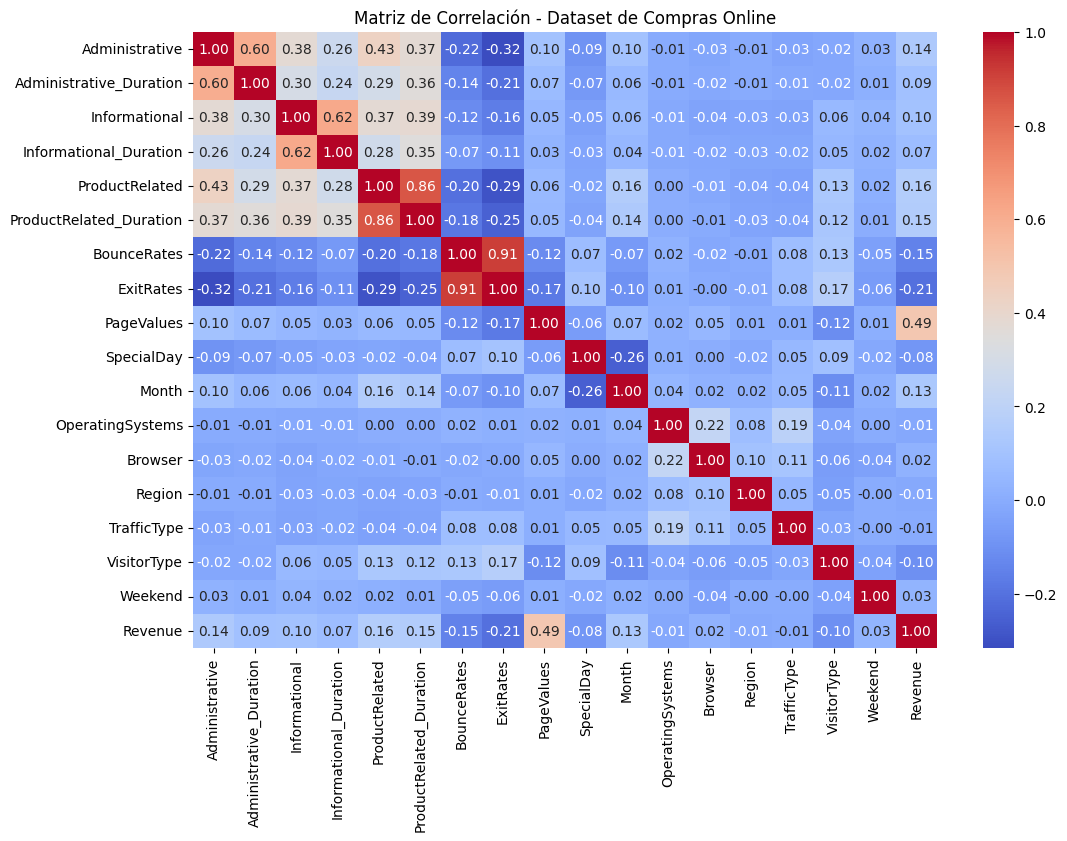

In [21]:
# analizamos que varibles son realmente utiles
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación - Dataset de Compras Online")
plt.show()

Con la informacion que el heatmap nos presenta podemos justificar la eliminacion de ciertas columnas.
Como por ejemplo:
* Administrative ya que contiene informacion menos valiosa que Administrative_Duration. De manera que si administrative esta en cero sabemos que adminsitrative_duration tambien lo va a estar y en caso de que no sean cero, la informacion que vamos a usar va a estar en duration no en administrative. Lo mismo para Informational y para product related
* Columnas como OperatingSystems, Browser, Region, SpecialDay y TrafficType tienen muy baja correlación y no aportan informacion directa #####################Chequear con random Forest igual


In [14]:
columns_to_drop= ['Administrative', 'Informational', 'ProductRelated', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'SpecialDay']
df = df.drop(columns=columns_to_drop)

print("Columnas finales para el modelo:")
df.columns

Columnas finales para el modelo:


Index(['Administrative_Duration', 'Informational_Duration',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
       'Month', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

### Busca de valores faltantes o atipicos
Analizaremos el data set en busca de nulos y outliers

In [6]:
# Valores nulos
df.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


Observarmos que no se presentan valores nulos lo cual a priori puede parecer extrano pero una vez avanzado el EDA comprendemos que por la naturaleza del problema podria ser veridico

<Axes: >

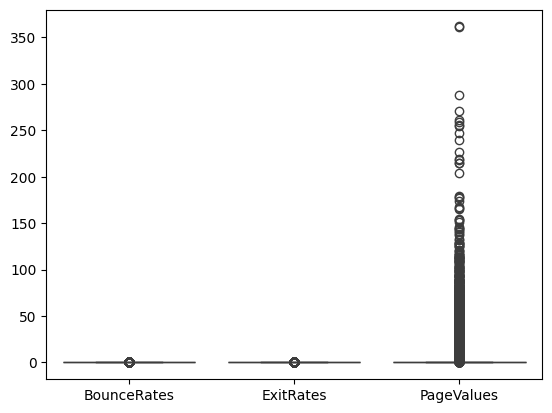

In [15]:
# Busca de valores atipicos
sns.boxplot(data=df[['BounceRates','ExitRates','PageValues']])


### Visualizaciones
histogramas, boxplots, heatmaps

array([[<Axes: title={'center': 'Administrative'}>,
        <Axes: title={'center': 'Administrative_Duration'}>,
        <Axes: title={'center': 'Informational'}>,
        <Axes: title={'center': 'Informational_Duration'}>],
       [<Axes: title={'center': 'ProductRelated'}>,
        <Axes: title={'center': 'ProductRelated_Duration'}>,
        <Axes: title={'center': 'BounceRates'}>,
        <Axes: title={'center': 'ExitRates'}>],
       [<Axes: title={'center': 'PageValues'}>,
        <Axes: title={'center': 'SpecialDay'}>,
        <Axes: title={'center': 'OperatingSystems'}>,
        <Axes: title={'center': 'Browser'}>],
       [<Axes: title={'center': 'Region'}>,
        <Axes: title={'center': 'TrafficType'}>, <Axes: >, <Axes: >]],
      dtype=object)

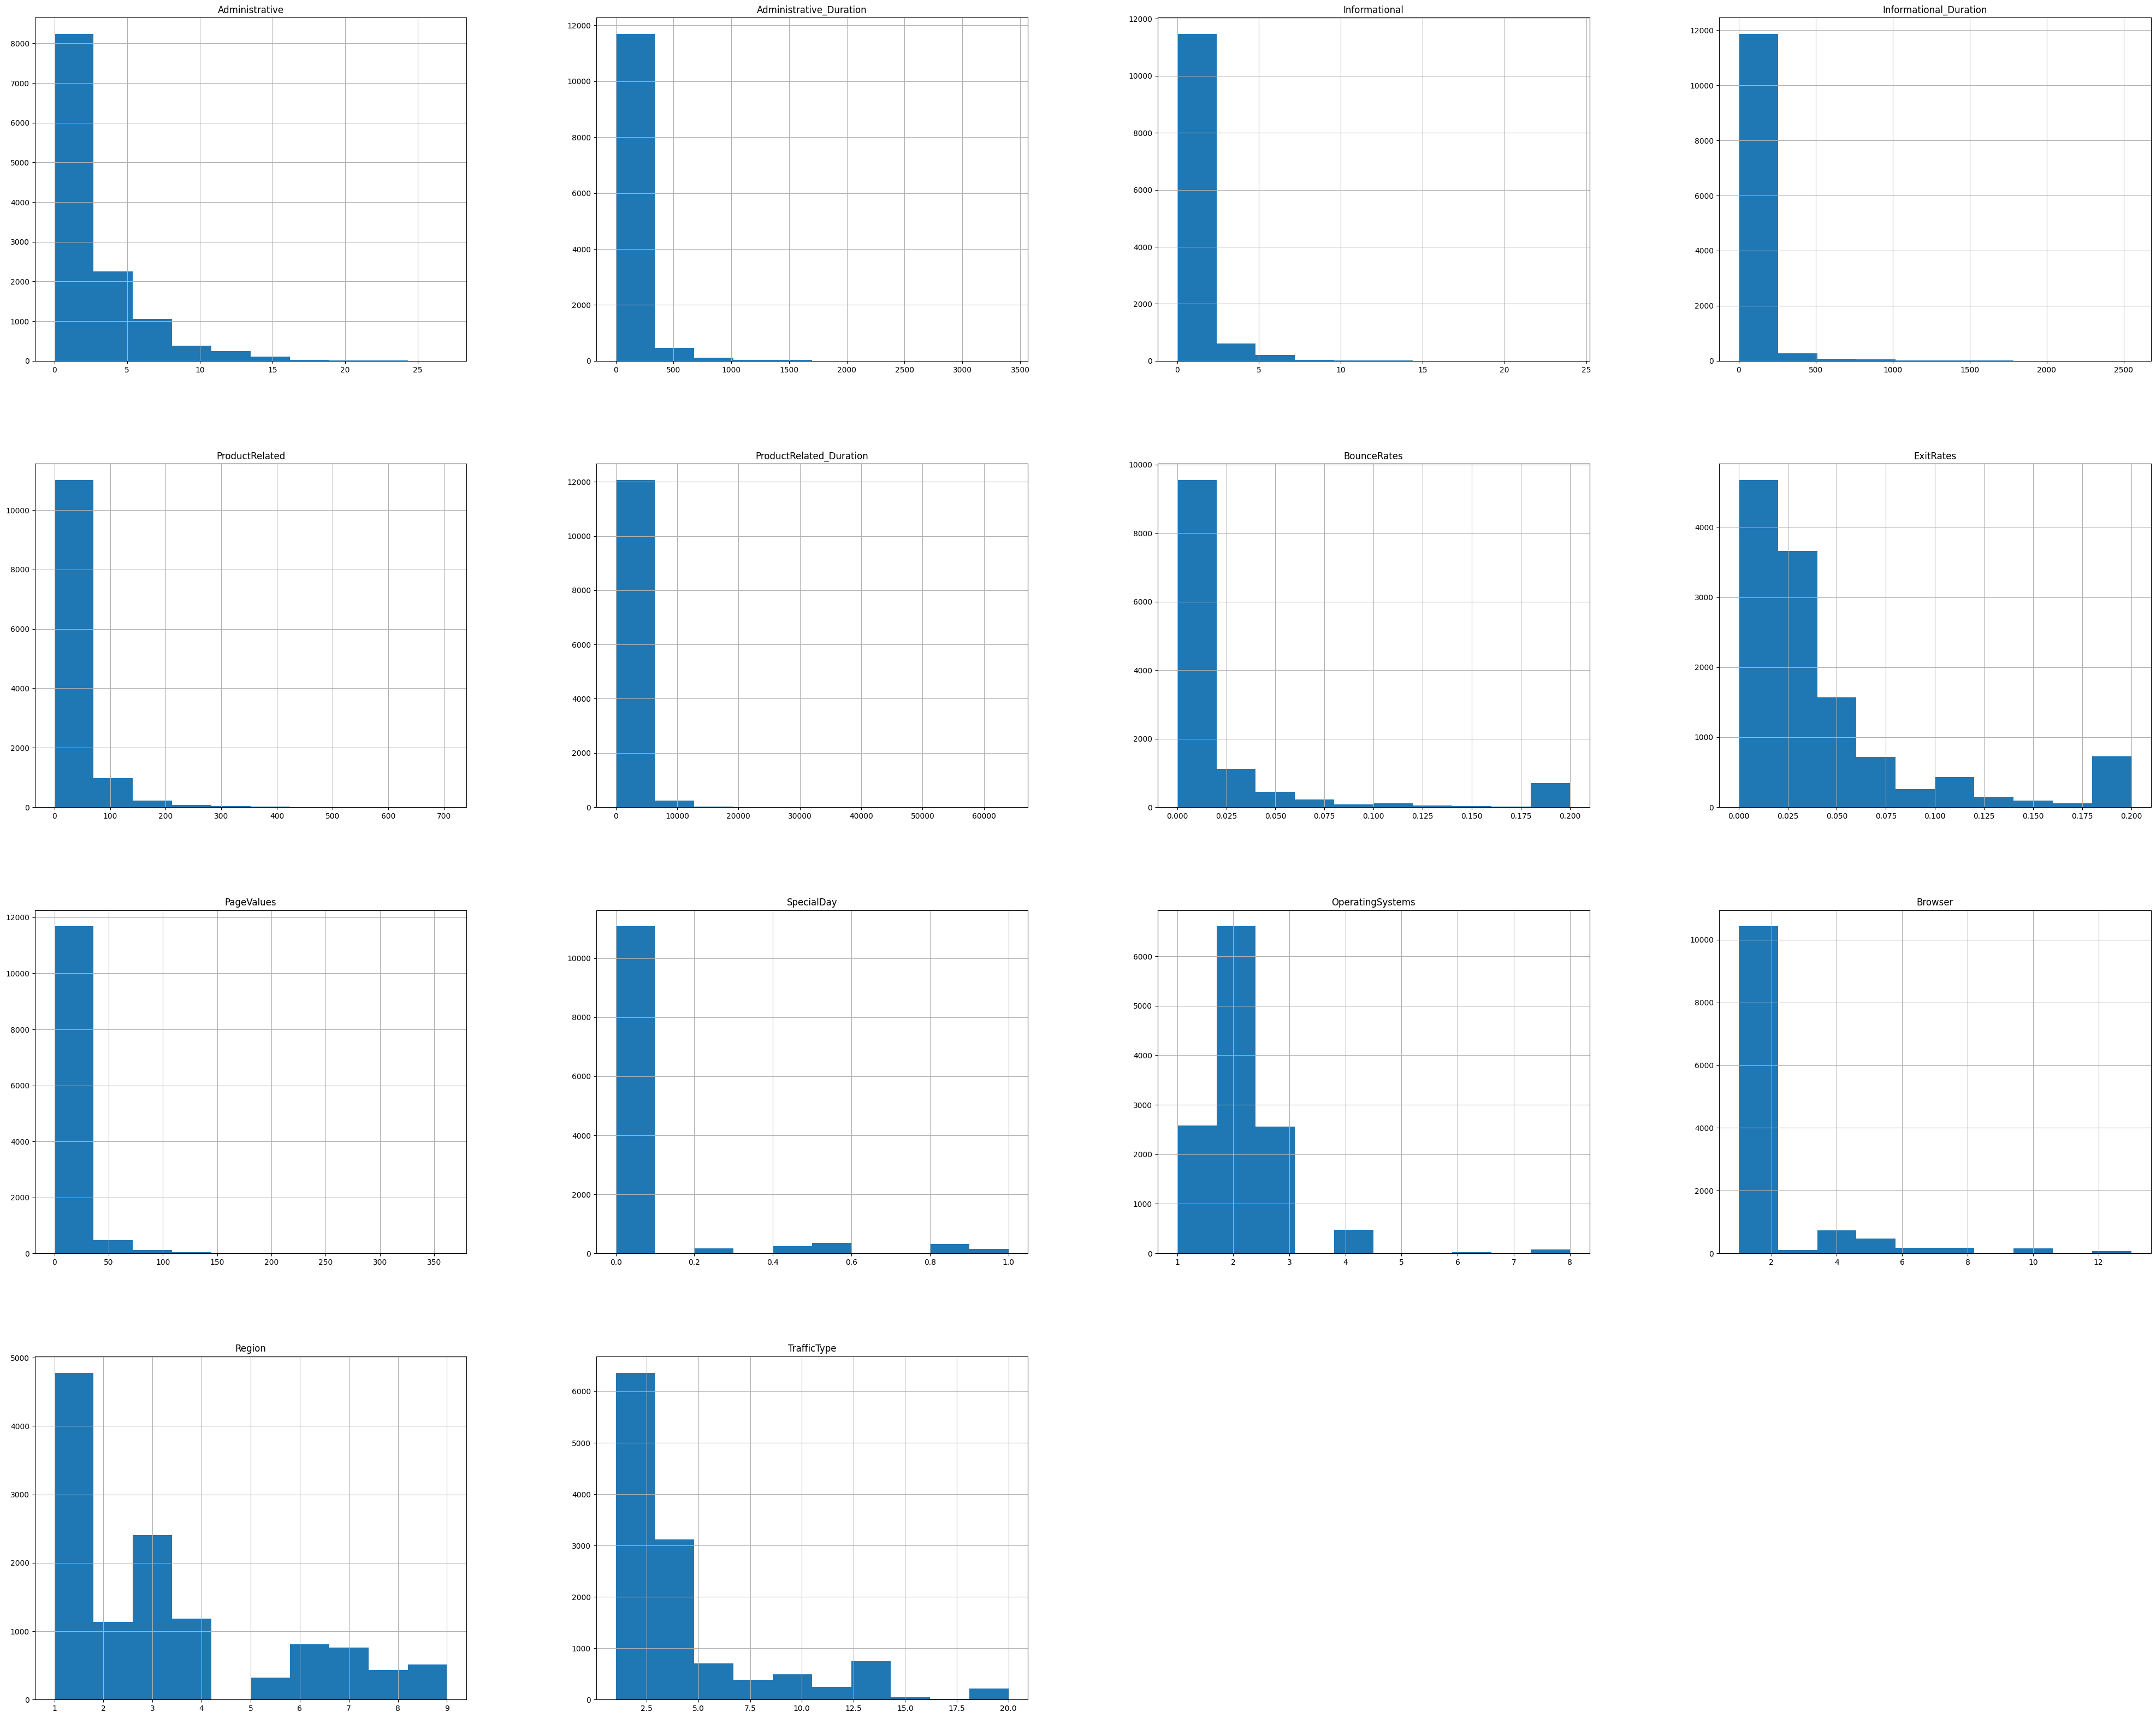

In [13]:
df.hist(figsize=(50,40))

In [ ]:
g = sns.histplot(data = df, x = 'total')

<Axes: xlabel='Revenue', ylabel='PageValues'>

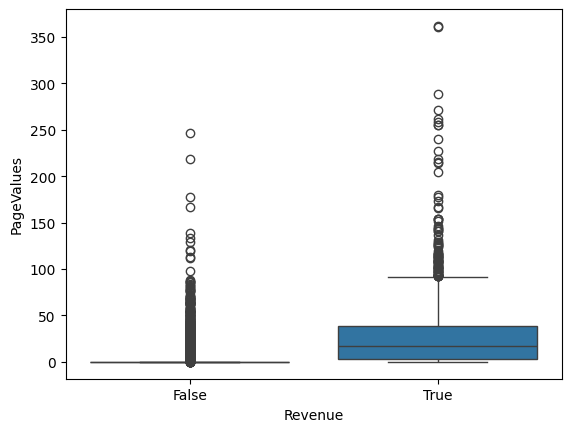

In [10]:
sns.boxplot(x='Revenue', y='PageValues', data=df)


,proportion
Revenue,
False,0.845255
True,0.154745


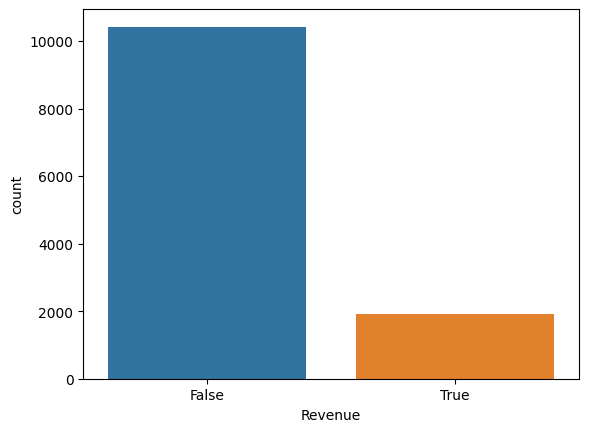

In [7]:
# Distribucion de la variable target

sns.countplot(x='Revenue', data=df, hue='Revenue', legend=False)
df['Revenue'].value_counts(normalize=True)

Se puede ver que el data set esta altamente desbalanceado, tendremos que analizar que metricas conviene utilizar para la evaluacion del modelo y conciderar un posible rebalanceo

<Axes: xlabel='Month', ylabel='count'>

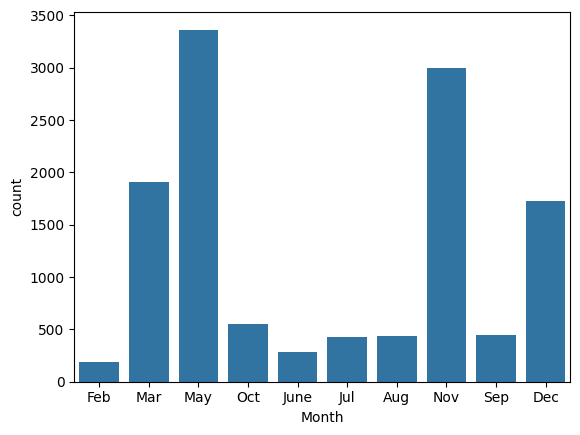

In [7]:
sns.countplot(x='Month', data=df)
